<a href="https://colab.research.google.com/github/weathon/slay/blob/main/BinaryCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# simple binary search review
import numpy as np

arr = [1, 3, 5, 6, 8, 10, 11, 12, 1, 80, 90, 165, 500, 600]
target = 600
left = 0
right = len(arr)-1
while True:
  mid = int((left+right)/2)
  if right-left==1:
    mid=right

  if arr[mid] == target:
    print(mid)
    break
  if arr[mid] < target:
    left = mid
  if arr[mid]>target:
    right=mid

13


In [3]:
# cut to half
arr = np.random.normal(size=88)
left = 0
right = len(arr)-1
threshold = (max(arr)-min(arr))/2
Ts = []
while True:
  LC = 0
  RC = 0
  for i in arr:
    if i<threshold:
      LC+=1
    else:
      RC+=1
    
  if LC<RC: #outside for
    threshold *=1.1
  elif RC<LC:
    threshold *= 0.9
  # print(LC, RC, threshold)
  Ts.append(threshold)

KeyboardInterrupt: ignored

13.0


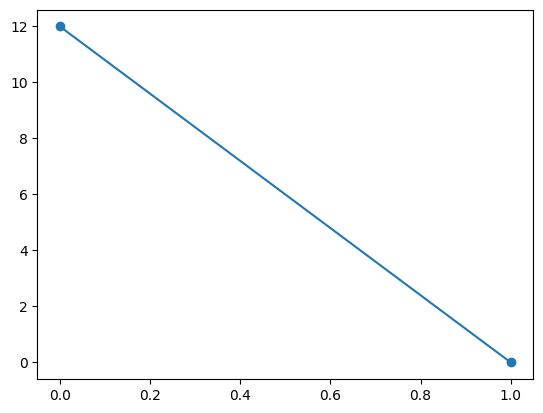

In [27]:
# cut to half
arr = [1,22,3,4,5,7,8,10,13,15,18,20,23,25]#[1, 3, 5, 6, 8, 10, 11, 12, 1, 80, 90, 165, 500, 600]#[1,5,8,10,100,200,300,500,800,1000,5000,30_000]
# for _ in range(100):
#   arr.append(arr[-1]+abs(np.random.normal())*1*abs(np.random.normal())) #it will not work if it iis unform? normal has plus and minus. lengruanno need for extream case
left = 0
right = len(arr)-1
threshold = np.max(arr)
Ts = []
lastT = 0
lastLC_RC = len(arr)+10
for _ in range(10):
  LC = 0
  RC = 0
  for i in arr:
    if i<threshold:
      LC+=1
    else:
      RC+=1
  if abs(LC-RC)>abs(lastLC_RC):
    threshold = lastT
    Ts.append(lastT)
    break
  if 0.45<(max(RC,LC)/(RC+LC))<0.55:
    Ts.append(LC-RC)
    break
  
  if lastLC_RC == LC - RC:
    Ts.append(LC-RC)
    break

  if LC<RC: 
    threshold += (threshold + np.max(arr))/2 #this is binary search?
  elif RC<LC:
    threshold -= (threshold - np.min(arr))/2
  Ts.append(LC-RC) #LC-RC is the loss?
  lastLC_RC = LC-RC
  lastT = threshold
  print(threshold)
pylab.scatter(range(len(Ts)), Ts)
pylab.plot(range(len(Ts)), Ts)


In [ ]:
Ts

In [ ]:
LC,RC

In [ ]:
pylab.plot(arr)

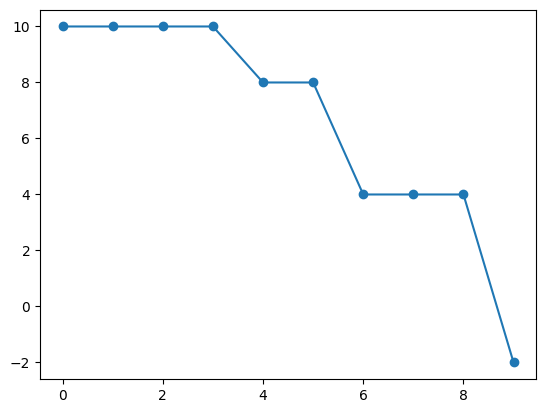

In [63]:
# cut to half
arr = [1, 3, 5, 6, 8, 10, 11, 12, 1, 80, 90, 165, 500, 600]#[1,5,8,10,100,200,300,500,800,1000,5000,30_000] 
# for _ in range(100):
#   arr.append(arr[-1]+abs(np.random.normal())*1*abs(np.random.normal())) #it will not work if it iis unform? normal has plus and minus. lengruanno need for extream case
left = 0
right = len(arr)-1
threshold = (np.max(arr)+np.min(arr))/2
Ts = []
lastT = 0
lastLC_RC = len(arr)+10
r = 1
for _ in range(100):
  LC = 0
  RC = 0
  for i in arr:
    if i<r*threshold:
      LC+=1
    else:
      RC+=1
  if abs(LC-RC)>abs(lastLC_RC):
    threshold = lastT
    break
  if 0.45<(max(RC,LC)/(RC+LC))<0.55:
    Ts.append(LC-RC)
    break
  
  if LC<RC: 
    r += 0.2 * abs(LC-RC)/(LC+RC)
  elif RC<LC:
    r -= 0.2 * abs(LC-RC)/(LC+RC)
  # print(abs(LC-RC)/(LC+RC))
  Ts.append(LC-RC) #LC-RC is the loss?
  lastLC_RC = LC-RC
  lastT = threshold
pylab.scatter(range(len(Ts)), Ts)
pylab.plot(range(len(Ts)), Ts)
